In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('grayscale')

/home/darko/Code/firedrake/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


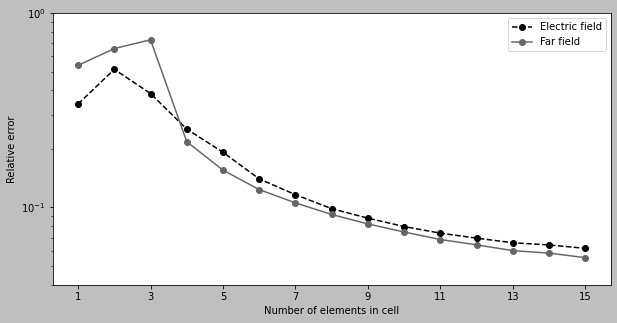

In [19]:
with open("results/results1.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    #skip header
    next(reader, None)
    results = np.array([[int(row[0]), float(row[3]), float(row[4])] for row in reader])

plt.plot(results[:, 0], results[:, 1], "o--", label="Electric field")
plt.plot(results[:, 0], results[:, 2], "o-", label="Far field")
plt.yscale("log")
plt.xlabel("Number of elements in cell")
plt.ylabel("Relative error")
plt.ylim([0.04, 1])
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.legend()
#plt.show()
plt.savefig("compare.pdf", bbox_inches="tight")

/home/darko/Code/firedrake/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


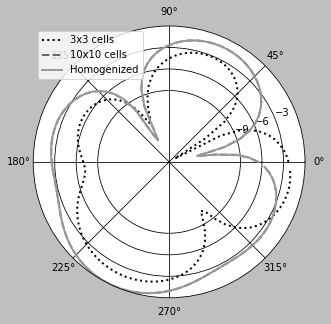

In [17]:
phi = np.linspace(0, 2 * np.pi, num = 120, endpoint = False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

label = ("3x3 cells", "10x10 cells", "Homogenized")
files = ("results/ff_isotropic-3.npy", "results/ff_isotropic-10.npy", "results/ff_anisotropic-10.npy")
dashes_type = (":", "--", "-")
ff = []
for file in files:
    with open(file, "rb") as f:
        ff.append(np.load(f))
ff = np.array(ff)
ff_max = np.abs(np.max(np.log10(ff)))
ff = 10 * (np.log10(ff) + ff_max)

for i in range(3):
    ax.plot(phi, ff[i], dashes_type[i], label=label[i], linewidth=2)
ax.set_rticks([-9, -6, -3])
plt.legend()
#plt.show()
plt.savefig("farfield.pdf", bbox_inches="tight")

/home/darko/Code/firedrake/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


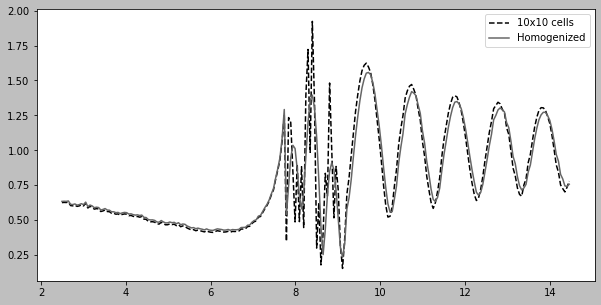

In [18]:
with open("results/plot_over_line.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    #skip header
    next(reader, None)
    results = np.array([[float(i) for i in row] for row in reader])
results = results[::3]
isotropic = results[:, 2] + results[:, 1]*1j
anisotropic = results[:, 4] + results[:, 3]*1j

plt.plot(results[:, 0], np.abs(isotropic), "--", label="10x10 cells")
plt.plot(results[:, 0], np.abs(anisotropic), "-", label="Homogenized")
plt.legend()
plt.savefig("line.pdf", bbox_inches="tight")